<a href="https://colab.research.google.com/github/Faraaztqureshi/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Qureshi_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [2]:
## get the data
import pandas as pd
df = pd.read_csv('HousingData.csv')
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
len(df)

506

In [0]:
## check for nulls then drop them
df.isnull().sum()
df = df.dropna()

In [0]:
## features
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [0]:
## target
target = ['MEDV']

In [0]:
X = df[features]

In [0]:
y = df[target]

In [38]:
## scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89677910e-01, 6.34657837e-02],
       ...,
       [4.37788609e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 2.02814570e-01],
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91250317e-01, 1.31070640e-01]])

In [41]:
len(features)

13

In [0]:
## put X and y into arrays
X = X.values
y = y.values

In [0]:
## tensorflow imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [45]:
#build our model
## build a model going in order from input layer --> hidden --> output
model = Sequential()
## dense means every node is connected to every other node
model.add(Dense(13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [47]:
## save 20 items to test
# Train the model
model.fit(
    X[20:],
    y[20:],
    epochs=50,
    shuffle=True,
    verbose=1
)






Epoch 1/50





374/374 [==============================] - 1s 2ms/step - loss: 102.4880
Epoch 2/50
374/374 [==============================] - 0s 40us/step - loss: 72.4726
Epoch 3/50
374/374 [==============================] - 0s 40us/step - loss: 63.7749
Epoch 4/50
374/374 [==============================] - 0s 40us/step - loss: 61.0259
Epoch 5/50
374/374 [==============================] - 0s 41us/step - loss: 60.3677
Epoch 6/50
374/374 [==============================] - 0s 55us/step - loss: 58.4815
Epoch 7/50
374/374 [==============================] - 0s 45us/step - loss: 57.5684
Epoch 8/50
374/374 [==============================] - 0s 52us/step - loss: 57.0388
Epoch 9/50
374/374 [==============================] - 0s 44us/step - loss: 56.0893
Epoch 10/50
374/374 [==============================] - 0s 42us/step - loss: 55.6282
Epoch 11/50
374/374 [==============================] - 0s 53us/step - loss: 54.9170
Epoch 12/50
374/374 [==============================] - 0s 42us/step - loss:

In [49]:
## make a prediction
prediction = model.predict(X[:1])
prediction

array([[26.18415]], dtype=float32)

In [50]:
y[:1]

array([[24.]])

In [51]:
## check overall error
test_error_rate = model.evaluate(X[:20], y[:20], verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: 18.50971031188965


In [52]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predictions = linear_regressor.predict(X)

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_predictions)

19.418397930734912

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [0]:
## import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [0]:
## import the data
data = keras.datasets.fashion_mnist

In [57]:
## separate into training and testing
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [58]:
## labels are 0-9 and correspond to specific classes
print(train_labels[0])

9


In [0]:
## these class names and thier order comes from the data
## 9 the first training label from above corresponds with tshirt/top
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
## verify I have 10 classes
len(class_names)

10

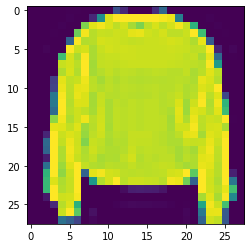

In [61]:
## to show images
plt.imshow(train_images[7])

In [62]:
## check for number of inputs
28 * 28

784

In [0]:
## we can do this each images is 28 x 28 array because 0 white 255 black
## normalize the 28 x 28 array
train_images = train_images/ 255

In [64]:
## start with 20% of inputs as hidden layer
.2 * 784

156.8

In [65]:
## define the architechture of our model
## the sequential means ordered layers input-->hidden-->output
model = keras.Sequential([
    ## flattens the input array (if 2d or 3d array)
    keras.layers.Flatten(input_shape=(28, 28)),
    ## dense layer means each neuron is connected to other neurons (fully connected)
    ## this is for the hidden layer
    keras.layers.Dense(157, activation='relu'),
    ## next is the output layer
    ## softmax picks values for each neuron that will add up to one (probability)
    keras.layers.Dense(10, activation='softmax')
    ])

## model parameters
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [66]:
## fit the model, epochs is how many times model sees images
## tweaks the order in which images are viewed
model.fit(train_images, train_labels, epochs=15)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4945 - acc: 0.8258
Epoch 2/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3699 - acc: 0.8653
Epoch 3/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3299 - acc: 0.8801
Epoch 4/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3065 - acc: 0.8878
Epoch 5/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2896 - acc: 0.8923
Epoch 6/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2746 - acc: 0.8981
Epoch 7/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2640 - acc: 0.9013
Epoch 8/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2528 - acc: 0.9056
Epoch 9/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2437 - acc: 0.9083
Epoch 10/15
60000/60000 [==============================] - 

In [67]:
## lets double the hidden layer
157 * 2

314

In [0]:
## I want to run the same test as above but widen my hidden layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(314, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

## model parameters
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [70]:
## fit the model
model.fit(train_images, train_labels, epochs=15)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1840 - acc: 0.9297
Epoch 2/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1768 - acc: 0.9340
Epoch 3/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1719 - acc: 0.9349
Epoch 4/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1667 - acc: 0.9376
Epoch 5/15
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1625 - acc: 0.9385
Epoch 6/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1572 - acc: 0.9419
Epoch 7/15
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1554 - acc: 0.9418
Epoch 8/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1502 - acc: 0.9429
Epoch 9/15
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1466 - acc: 0.9450
Epoch 10/15
60000/60000 [==============================] - 

In [72]:
.66 * 784

517.44

In [0]:
## widen the hidden layer to 2/3 input layer
## change optimizer to nadam
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(518, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

## model parameters
model.compile(optimizer='nadam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [74]:
## fit the model
model.fit(train_images, train_labels, epochs=15)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 221us/sample - loss: 0.4665 - acc: 0.8330
Epoch 2/15
60000/60000 [==============================] - 13s 223us/sample - loss: 0.3467 - acc: 0.8722
Epoch 3/15
60000/60000 [==============================] - 13s 222us/sample - loss: 0.3092 - acc: 0.8867
Epoch 4/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2901 - acc: 0.8928
Epoch 5/15
60000/60000 [==============================] - 13s 223us/sample - loss: 0.2710 - acc: 0.8992
Epoch 6/15
60000/60000 [==============================] - 13s 225us/sample - loss: 0.2565 - acc: 0.9056
Epoch 7/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2456 - acc: 0.9090
Epoch 8/15
60000/60000 [==============================] - 13s 222us/sample - loss: 0.2349 - acc: 0.9111
Epoch 9/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2250 - acc: 0.9155
Epoch 10/15
60000/60000 [================

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1731 - acc: 0.9344
Epoch 2/15
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1703 - acc: 0.9352
Epoch 3/15
60000/60000 [==============================] - 13s 223us/sample - loss: 0.1625 - acc: 0.9376
Epoch 4/15
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1587 - acc: 0.9399
Epoch 5/15
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1538 - acc: 0.9413
Epoch 6/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1488 - acc: 0.9445
Epoch 7/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1441 - acc: 0.9458
Epoch 8/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.1396 - acc: 0.9475
Epoch 9/15
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1386 - acc: 0.9478
Epoch 10/15
60000/60000 [================

KeyError: ignored

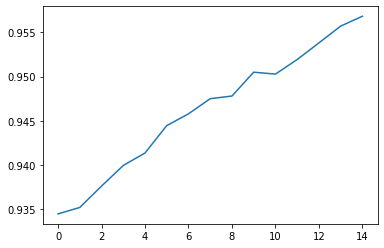

In [75]:
import matplotlib.pyplot as plt

history = model.fit(train_images, train_labels, epochs=15, verbose=1)

# Plot  accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Label'], loc='upper left')
plt.show()

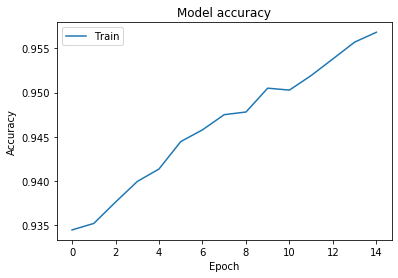

In [77]:
# Plot accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.